In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
from dataset import Data, ResizeTransform
from gan import GeneratorNet, Discriminator, train
from torch.utils.data import DataLoader
import torch
import matplotlib.pyplot as plt
from visualize import plot_batch, PlotLossCallback

%matplotlib notebook

Populating the interactive namespace from numpy and matplotlib


In [8]:
DATA_PATH = 'data/img_align_celeba'
BATCH_SIZE = 512
NUM_WORKERS = 1
Z_SIZE = 100
MODEL_PATH = 'model/'
LOAD_MODEL = True
LOAD_EPOCH_N = 1

In [3]:

transform = ResizeTransform()
data = Data(DATA_PATH, Z_SIZE, transform)
data_loader = DataLoader(data, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS, drop_last=True)
print('Dataset size: ', len(data))


Dataset size:  202599


In [4]:
generator = GeneratorNet(Z_SIZE).cuda()
discriminator = Discriminator().cuda()

In [9]:
if LOAD_MODEL:
    generator.load_state_dict(torch.load(MODEL_PATH + 'generator_%d.pth' % (LOAD_EPOCH_N,)))
    discriminator.load_state_dict(torch.load(MODEL_PATH + 'discriminator_%d.pth' % (LOAD_EPOCH_N,)))

In [ ]:
callback = PlotLossCallback(generator, discriminator)
train(generator, discriminator, data_loader, 100, k=2, callback_func=callback)


In [11]:
Z = torch.normal(mean=torch.zeros(4, generator.z_size)).cuda()
G_sample = generator(Z)
print(Z)

tensor([[-7.9339e-01, -4.6041e-01,  2.3126e+00,  1.1607e+00, -4.2917e-01,
         -1.2389e+00, -8.9402e-01,  1.3228e+00,  9.2775e-01, -1.3438e+00,
         -5.0058e-01,  9.1669e-01, -3.8711e-01,  5.0837e-01,  1.1605e+00,
          4.1266e-02, -2.9452e-01, -4.8518e-01, -1.6008e+00, -2.7763e-01,
         -2.5330e-01, -1.2219e+00,  7.4478e-01, -1.9083e+00,  3.8741e-02,
          3.0738e-01, -1.5218e-01, -9.5762e-01,  7.5928e-01, -3.6574e-01,
          2.8331e-01,  1.0858e+00,  2.7025e-01,  1.8117e+00, -9.2409e-01,
         -1.3670e-01,  9.8043e-01,  1.1534e+00, -1.8995e+00, -2.0075e-01,
         -5.2881e-01, -1.1200e-01,  1.2136e-01, -3.7059e-01,  8.8829e-01,
          8.4854e-01, -6.5584e-01,  5.4146e-01, -1.2477e+00,  5.9938e-01,
         -9.5272e-01,  5.6909e-01, -1.0553e+00, -1.1374e+00, -1.0099e+00,
         -4.4943e-01,  4.3429e-01, -1.6951e+00, -3.2224e-01,  1.2415e+00,
          1.9627e-01,  1.6792e+00, -1.1834e+00, -2.1738e+00,  9.5442e-01,
         -7.0627e-01, -8.2028e-01, -1.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


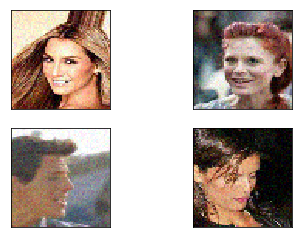

In [12]:
for batch, Z in data_loader:
    plot_batch(batch.data.cpu().numpy(), limit=4)
    break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[ 0.21681075  0.28050697  0.26100314 -0.14869663  0.2588619  -0.20619543
   0.27372897 -0.14200436 -0.33896646 -0.28750598  0.30885518  0.0451801
  -0.3446655   0.11078279 -0.30673194  0.15899375  0.26447856 -0.19865373
   0.35783207  0.03003825  0.25953344  0.23649321  0.27196777 -0.10077463
   0.06701429  0.3089653  -0.3722889  -0.12776858  0.06755883  0.05970098
   0.27205715 -0.22036046  0.19492869  0.30312186 -0.22220488  0.12009379
   0.02681916 -0.28878844  0.3495772   0.04489585 -0.09470955 -0.23538756
   0.28813973  0.23433465  0.03587852  0.03738723 -0.34487477  0.09382908
  -0.16799903 -0.33104312  0.28993976  0.1605061  -0.25763866  0.10269617
  -0.23597987  0.20326075  0.10710573 -0.35842863  0.06388035  0.16483177
  -0.41713807  0.24595675 -0.34637222  0.02133844  0.13660741 -0.19180457
   0.14495048  0.3164863   0.011253    0.16635959 -0.24224144 -0.27806628
   0.07244957  0.19159742 -0.2975955  -0.25367624  0.20695414 -0.00361358
  -0.31672788  0.20763314 -0.24890624  

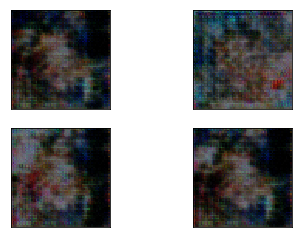

In [13]:
sample = G_sample.data.cpu().numpy()
print(discriminator.layer4.weight.cpu().detach().numpy())
plot_batch(G_sample.data.cpu().numpy())

In [8]:
w = generator.layer3[0].weight.data.cpu().numpy()
print(w)

[[[[-0.04105375  0.02109889 -0.03024831]
   [-0.00518503 -0.06166307 -0.09377846]
   [-0.03281882 -0.03686197 -0.04104852]]

  [[-0.06686275 -0.07540448 -0.00130985]
   [ 0.00112652  0.00076047  0.00592973]
   [-0.01950828 -0.07099712 -0.0460108 ]]

  [[-0.04828236 -0.01160194  0.04058102]
   [-0.04942453  0.06773283  0.04130521]
   [-0.00442525  0.06905251 -0.02015292]]

  ...

  [[ 0.11623833 -0.00054184  0.04948538]
   [ 0.02949225  0.03604141 -0.02215988]
   [ 0.07631499 -0.03415054  0.00905579]]

  [[ 0.07983878  0.02954735  0.01334696]
   [ 0.03661667  0.07948682 -0.03809227]
   [-0.04415793 -0.03813324  0.01401544]]

  [[ 0.06605397  0.0569588  -0.03590357]
   [-0.03825995  0.00938805 -0.04076832]
   [-0.00433741 -0.06477639 -0.03092516]]]


 [[[ 0.04163229  0.03900903  0.00674794]
   [-0.02784919 -0.06622361 -0.02930488]
   [-0.00719086 -0.08586799 -0.0503331 ]]

  [[-0.02829024 -0.04188479 -0.04281064]
   [ 0.00226749 -0.05572962 -0.05123239]
   [-0.01241535 -0.04251146 -0.040

In [ ]:
for batch, Z in data_loader:
    X = batch.cuda()
    Z = Z.cuda()
    G_sample = generator(Z)
    D_real, D_logit_real = discriminator(X)
    D_fake, D_logit_fake = discriminator(G_sample)
    print('D_real', D_real,'\n', 'D_fake', D_fake)
    print('D_logit_real', D_logit_real, '\n', 'D_logit_fake', D_logit_fake)
    break
    